In [69]:
import pandas as pd
import geopandas as gpd

,name,geometry
0,Areas of Need - Denver Equity Index,"MULTIPOLYGON (((-105.04570 39.63165, -105.0456..."


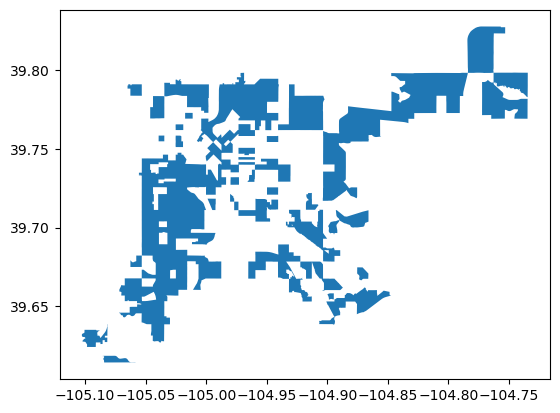

In [82]:
equity_layer = gpd.read_file("equity.geojson")
areas_of_need = equity_layer[equity_layer['EquityGroupRank'] < 4]
areas_of_need = areas_of_need.dissolve()
areas_of_need['name'] = "Areas of Need - Denver Equity Index"
areas_of_need = areas_of_need[["name", 'geometry']]
areas_of_need.plot()
areas_of_need
areas_of_need.to_file("denver_equity_index.geojson", driver="GeoJSON")

In [ ]:
colorado = gpd.read_file("~/Downloads/tl_2024_08_cousub.zip")
denver = colorado[colorado['NAME'] == "Denver"]
denver['name'] = "Denver City Limits"
denver = denver[['name', 'geometry']]
denver.to_file("city_limits.geojson", driver="GeoJSON")
denver.plot()

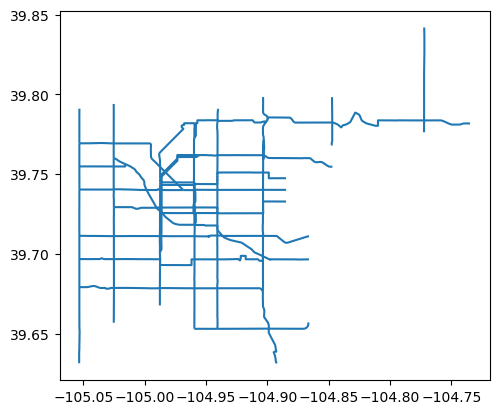

In [100]:
transit = gpd.read_file("transit.geojson")
transit['name'] = "Transit Priority Streets - Blueprint Denver"
transit = transit.dissolve()
transit.plot()
transit.to_file("transit_priority_streets.geojson", driver="GeoJSON")

In [101]:
transit

,geometry,name
0,"MULTILINESTRING ((-105.02524 39.79404, -105.02...",Transit Priority Streets - Blueprint Denver


,geometry,name
0,"MULTILINESTRING ((-105.02524 39.79404, -105.02...",Transit Priority Streets - Blueprint Denver


In [79]:
areas_of_need = areas_of_need.dissolve()

,geometry,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,BLKGRPCE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,...,MinorRank,IncomeRank,EducRank,AgeRank,NoVehRank,FemaleHHRank,DisableRank,EquityScore,EquityGroupRank,GlobalID
0,"MULTIPOLYGON (((-105.04570 39.63165, -105.0456...",1,08,031,004110,2,080310041102,Block Group 2,G5030,S,...,2,2,3,2,1,3,3,36,3,76ac3ec9-f670-4700-9132-cc875ef5afc3


/home/tonydeals/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot:>

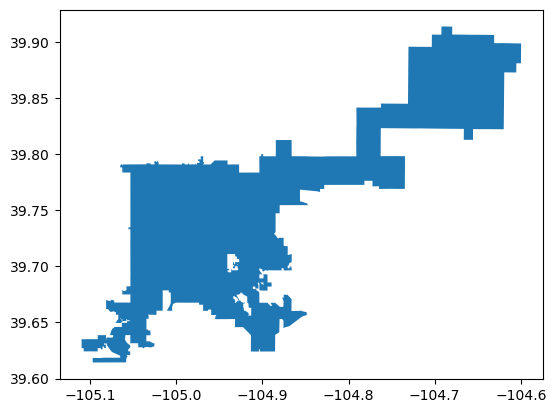

In [67]:
gpd.GeoSeries(geometry)

0      POLYGON ((-104.89036 39.76523, -104.89036 39.7...
2      POLYGON ((-104.93179 39.76576, -104.93177 39.7...
3      POLYGON ((-104.94066 39.76447, -104.94063 39.7...
7      POLYGON ((-104.97842 39.77531, -104.97821 39.7...
12     POLYGON ((-105.00288 39.76061, -105.00284 39.7...
                             ...                        
562    POLYGON ((-105.02507 39.69492, -105.02507 39.6...
564    POLYGON ((-104.92229 39.76568, -104.92229 39.7...
565    POLYGON ((-105.02505 39.67901, -105.02504 39.6...
568    POLYGON ((-105.05325 39.70270, -105.05325 39.7...
570    POLYGON ((-104.75630 39.78094, -104.75628 39.7...
Name: geometry, Length: 249, dtype: geometry

In [68]:
gdf = gpd.GeoDataFrame(columns=["name"], data=[["Areas of Need - Denver Equity Index"]], geometry=gpd.GeoSeries(geometry))

In [65]:
gdf.set_geometry()

/home/tonydeals/anaconda3/lib/python3.9/site-packages/shapely/geometry/geo.py:123: ShapelyDeprecationWarning: GeometryTypeError will derive from ShapelyError and not TypeError or ValueError in Shapely 2.0.
  raise GeometryTypeError("Unknown geometry type: %s" % geom_type)


GeometryTypeError: Unknown geometry type: featurecollection

In [64]:
gdf

,name,geometry
0,Areas of Need - Denver Equity Index,"POLYGON ((-104.89036 39.76523, -104.89036 39.7..."


<AxesSubplot:>

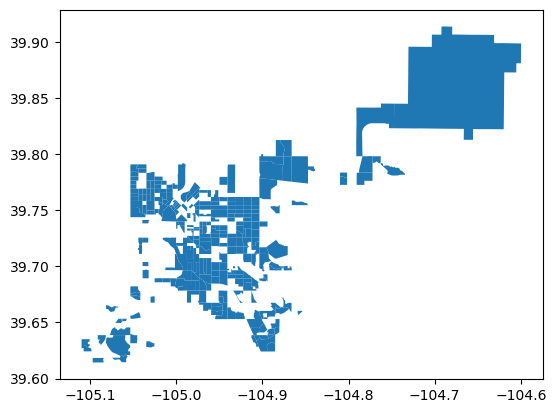

In [8]:
equity_layer[equity_layer['EquityScore'] < 30].plot()

<AxesSubplot:>

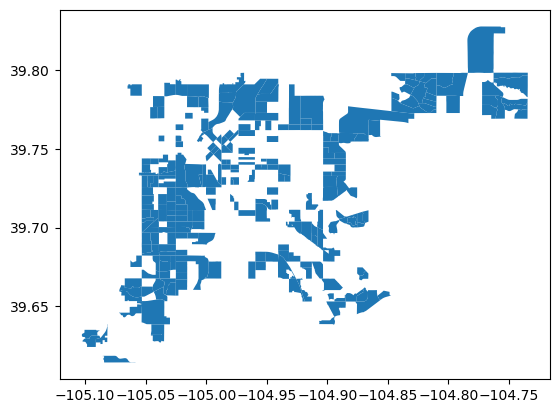

In [13]:
equity_layer[equity_layer['EquityGroupRank'] < 4].plot()

In [11]:
equity_layer.sort_values("EquityScore")

,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,BLKGRPCE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,...,IncomeRank,EducRank,AgeRank,NoVehRank,FemaleHHRank,DisableRank,EquityScore,EquityGroupRank,GlobalID,geometry
571,572,08,031,980001,1,080319800011,Block Group 1,G5030,S,103458746,...,1,1,1,1,1,1,16,6,d36a69a9-7fda-4ee0-82dc-91672c53135a,"POLYGON ((-104.74700 39.84530, -104.74725 39.8..."
173,174,08,031,001403,4,080310014034,Block Group 4,G5030,S,619891,...,1,1,1,1,1,1,16,6,d016dbc8-470b-4f46-900e-5e9b34529c8e,"POLYGON ((-105.00143 39.68291, -105.00141 39.6..."
167,168,08,031,001705,3,080310017053,Block Group 3,G5030,S,85524,...,1,1,1,1,1,1,16,6,c193a810-171c-4fa5-b68b-d2e0d423952e,"POLYGON ((-105.00414 39.75444, -105.00373 39.7..."
166,167,08,031,008388,6,080310083886,Block Group 6,G5030,S,305919,...,1,1,1,1,1,1,16,6,379afddd-78f0-4dbc-9c58-f07f1885ac5d,"POLYGON ((-104.80984 39.78067, -104.80983 39.7..."
154,155,08,031,008388,4,080310083884,Block Group 4,G5030,S,1584901,...,1,1,1,1,1,1,16,6,642aa024-9372-4b41-8cf9-566a8f359157,"POLYGON ((-104.79059 39.77291, -104.79057 39.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,08,031,002300,1,080310023001,Block Group 1,G5030,S,486082,...,4,4,3,4,3,5,63,1,328e5867-ef31-40fc-90c2-e4dbda85a765,"POLYGON ((-104.97335 39.76115, -104.97334 39.7..."
399,400,08,031,004602,1,080310046021,Block Group 1,G5030,S,484919,...,4,4,4,4,3,4,63,1,cb5b2c7f-6aa1-4f74-99d5-f3e52a088955,"POLYGON ((-105.03207 39.69673, -105.03202 39.6..."
190,191,08,031,000503,1,080310005031,Block Group 1,G5030,S,162377,...,5,2,5,5,4,5,64,1,56743c42-77bb-43a6-9444-0f8b0593fd2b,"POLYGON ((-105.03932 39.75523, -105.03931 39.7..."
422,423,08,031,015700,1,080310157001,Block Group 1,G5030,S,498847,...,5,4,3,4,3,5,66,1,e3c385c6-9f4c-455d-9bc5-44b6b43f1289,"POLYGON ((-105.03777 39.66733, -105.03777 39.6..."
